### Setup the Spark VM and complete the below assignment

Objective:- Build a ML model to predict the employee compensation.
The application should be modelled using Spark.

You can refer to the below links for spark commands:- 
- https://spark.apache.org/docs/latest/ml-pipeline.html

- https://github.com/spark-in-action/first-edition

- https://github.com/FavioVazquez/first_spark_model

# Predicting Employee Compensation

## Data Dictionary
<br>**Year Type** - Fiscal (July through June) or Calendar (January through December)
<br>**Year** - An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.
<br>**Organization Group Code** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,Fire, Adult Probation, District Attorney, and Sheriff.
<br> **Organization Group** - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police,
Fire, Adult Probation, District Attorney, and Sheriff.
<br>**Department Code** - Departments are the primary organizational unit used by the Cityand County of San Francisco. Examples include Recreation and
Parks, Public Works, and the Police Department.
<br>**Department Code** - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.
<br>**Union Code** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Union** - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).
<br>**Job Family Code** Job Family combines similar Jobs into meaningful groups.
<br>**Job Family** Job Family combines similar Jobs into meaningful groups.
<br>**Employee Identifier** Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the
Employee Compensation report hosted on openbook.sfgov.org,
but that report does show one row for each employee. Employee
ID has been included here to allow users to reconstruct the
original report. Note that each employee’s identifier will change
each time this dataset is updated, so comparisons by employee
across multiple versions of the dataset are not possible.
<br>**Salaries** - Normal salaries paid to permanent or temporary City employees.
<br>**Overtime** - Amounts paid to City employees working in excess of 40 hours
per week.
<br>**Other Salaries** - Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments. Total Salary Number The sum of all salaries paid to City employees.
<br>**Retirement** City contributions to employee retirement plans.
<br>**Health/Dental** City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.
<br>**Other Benefits** Mandatory benefits paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment
insurance premiums, and minor discretionary benefits not included in the above categories.
<br>**Total Benefits** The sum of all benefits paid to City employees.
<br>**Total Compensation** The sum of all salaries and benefits paid to City employees.

Read the data and answer the following questions to predict employee compensation

## 1. Read the Data

In [2]:
import findspark
#findspark.init()
findspark.init("/home/sarvani/spark-3.3.1-bin-hadoop3")
findspark.find()
import pyspark
from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F
from pyspark import SparkFiles

spark= SparkSession.builder.appName("Assignment part2").getOrCreate()
spark.sparkContext.addFile("Employee_Compensation.csv")

23/02/12 18:33:19 WARN Utils: Your hostname, sarvani-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/02/12 18:33:19 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/12 18:33:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df=spark.read.csv(SparkFiles.get("Employee_Compensation.csv"), inferSchema=True, header=True)
df.show()

+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+------------------+
|Year Type|Year|Organization Group Code|  Organization Group|Department Code|          Department|Union Code|               Union|Job Family Code|          Job Family|Job Code|                 Job|Employee Identifier| Salaries|Overtime|Other Salaries|Total Salary|Retirement|Health/Dental|Other Benefits|Total Benefits|Total Compensation|
+---------+----+-----------------------+--------------------+---------------+--------------------+----------+--------------------+---------------+--------------------+--------+--------------------+-------------------+---------+--------+--------------+------------+----------+-------------+--------------+--------------+---

### 1.1 Display the number of rows and columns in the dataset

In [4]:
r_cnt=df.count()
c_cnt=len(df.columns)
print(f"Row count: {r_cnt}, Column count: {c_cnt}")

Row count: 291825, Column count: 22


### 1.2 Check the datatype of the variables

In [5]:
df.printSchema()

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Organization Group Code: integer (nullable = true)
 |-- Organization Group: string (nullable = true)
 |-- Department Code: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union Code: integer (nullable = true)
 |-- Union: string (nullable = true)
 |-- Job Family Code: string (nullable = true)
 |-- Job Family: string (nullable = true)
 |-- Job Code: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- Employee Identifier: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- Other Salaries: double (nullable = true)
 |-- Total Salary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- Health/Dental: double (nullable = true)
 |-- Other Benefits: double (nullable = true)
 |-- Total Benefits: double (nullable = true)
 |-- Total Compensation: double (nullable = true)



### 2. Convert the incorrect column type into its suitable column type. And drop the redundant features

In [6]:
#Dropping redundant columns
df_new=df.drop("Organization Group Code", "Department Code", "Union Code", "Job Family Code", "Job Code")
df1=df_new.withColumnRenamed("Organization Group", "OrganizationGroup")\
    .withColumnRenamed("Job Family", "JobFamily")\
    .withColumnRenamed("Employee Identifier", "EmployeeId")\
    .withColumnRenamed("Other Salaries", "OtherSalaries")\
    .withColumnRenamed("Total Salary", "TotalSalary")\
    .withColumnRenamed("Health/Dental", "HealthDental")\
    .withColumnRenamed("Other Benefits", "OtherBenefits")\
    .withColumnRenamed("Total Benefits", "TotalBenefits")\
    .withColumnRenamed("Total Compensation", "TotalCompensation")

In [7]:
df1.show(5, False)

+---------+----+--------------------+------------------------------+---------------------------------+-----------------------------+---------------------------+----------+---------+--------+-------------+-----------+----------+------------+-------------+-------------+-----------------+
|Year Type|Year|OrganizationGroup   |Department                    |Union                            |JobFamily                    |Job                        |EmployeeId|Salaries |Overtime|OtherSalaries|TotalSalary|Retirement|HealthDental|OtherBenefits|TotalBenefits|TotalCompensation|
+---------+----+--------------------+------------------------------+---------------------------------+-----------------------------+---------------------------+----------+---------+--------+-------------+-----------+----------+------------+-------------+-------------+-----------------+
|Fiscal   |2016|Public Protection   |District Attorney             |Municipal Attorneys' Association |Legal & Court                |Attorne

### 3. Check basic statistics and perform necessary data preprocessing (Like removing negative amount)

In [8]:
#Removing rows where the amount is negative
df2=df1.where("Salaries>=0 and Overtime>=0 and OtherSalaries>=0 and TotalSalary>=0 and Retirement>=0 and HealthDental>=0 and OtherBenefits>=0 and TotalBenefits>=0 and TotalCompensation>=0")
df2.show(5, False)

+---------+----+--------------------+------------------------------+---------------------------------+-----------------------------+---------------------------+----------+---------+--------+-------------+-----------+----------+------------+-------------+-------------+-----------------+
|Year Type|Year|OrganizationGroup   |Department                    |Union                            |JobFamily                    |Job                        |EmployeeId|Salaries |Overtime|OtherSalaries|TotalSalary|Retirement|HealthDental|OtherBenefits|TotalBenefits|TotalCompensation|
+---------+----+--------------------+------------------------------+---------------------------------+-----------------------------+---------------------------+----------+---------+--------+-------------+-----------+----------+------------+-------------+-------------+-----------------+
|Fiscal   |2016|Public Protection   |District Attorney             |Municipal Attorneys' Association |Legal & Court                |Attorne

### 4. Perform Missing Value Analysis

In [9]:
from pyspark.sql.functions import isnull, when, count, col
df2.select([count(when(isnull(c), c)).alias(c) for c in df2.columns]).show()

+---------+----+-----------------+----------+-----+---------+---+----------+--------+--------+-------------+-----------+----------+------------+-------------+-------------+-----------------+
|Year Type|Year|OrganizationGroup|Department|Union|JobFamily|Job|EmployeeId|Salaries|Overtime|OtherSalaries|TotalSalary|Retirement|HealthDental|OtherBenefits|TotalBenefits|TotalCompensation|
+---------+----+-----------------+----------+-----+---------+---+----------+--------+--------+-------------+-----------+----------+------------+-------------+-------------+-----------------+
|        0|   0|                0|         0|   43|       45|  0|         0|       0|       0|            0|          0|         0|           0|            0|            0|                0|
+---------+----+-----------------+----------+-----+---------+---+----------+--------+--------+-------------+-----------+----------+------------+-------------+-------------+-----------------+



In [10]:
df2=df2.na.drop()

In [11]:
from pyspark.sql.functions import isnull, when, count, col
df2.select([count(when(isnull(c), c)).alias(c) for c in df2.columns]).show()

+---------+----+-----------------+----------+-----+---------+---+----------+--------+--------+-------------+-----------+----------+------------+-------------+-------------+-----------------+
|Year Type|Year|OrganizationGroup|Department|Union|JobFamily|Job|EmployeeId|Salaries|Overtime|OtherSalaries|TotalSalary|Retirement|HealthDental|OtherBenefits|TotalBenefits|TotalCompensation|
+---------+----+-----------------+----------+-----+---------+---+----------+--------+--------+-------------+-----------+----------+------------+-------------+-------------+-----------------+
|        0|   0|                0|         0|    0|        0|  0|         0|       0|       0|            0|          0|         0|           0|            0|            0|                0|
+---------+----+-----------------+----------+-----+---------+---+----------+--------+--------+-------------+-----------+----------+------------+-------------+-------------+-----------------+



### 5. Exploratory Data Analysis

#### 5.1. Find top compensating organizations. Display using bar plot

In [12]:
type(df2)

pyspark.sql.dataframe.DataFrame

root
 |-- Year Type: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- OrganizationGroup: string (nullable = true)
 |-- Department: string (nullable = true)
 |-- Union: string (nullable = true)
 |-- JobFamily: string (nullable = true)
 |-- Job: string (nullable = true)
 |-- EmployeeId: integer (nullable = true)
 |-- Salaries: double (nullable = true)
 |-- Overtime: double (nullable = true)
 |-- OtherSalaries: double (nullable = true)
 |-- TotalSalary: double (nullable = true)
 |-- Retirement: double (nullable = true)
 |-- HealthDental: double (nullable = true)
 |-- OtherBenefits: double (nullable = true)
 |-- TotalBenefits: double (nullable = true)
 |-- TotalCompensation: double (nullable = true)



<AxesSubplot:xlabel='OrganizationGroup'>

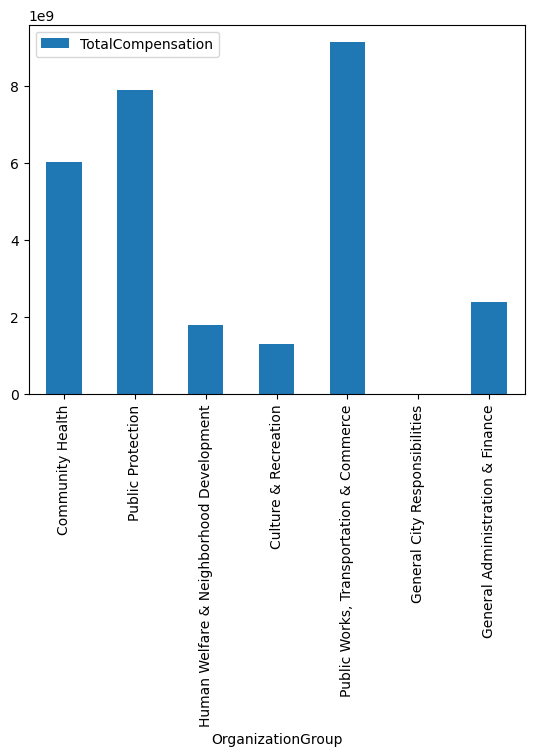

In [13]:
from pyspark.sql.functions import sum
from matplotlib.pyplot import plot
import pandas as pd
df2.printSchema()
df3=df2.orderBy("TotalCompensation").groupBy("OrganizationGroup").agg(sum("TotalCompensation").alias("TotalCompensation"))
#type(df3)
#myplot=df3.plot(kind='bar')
#df3.plot.bar()
df4=df3.toPandas()
df4.head(5)
df4.plot.bar(x='OrganizationGroup', y='TotalCompensation')

#### 5.2. Find top Compensating Jobs. Display using bar plot

<AxesSubplot:xlabel='JobFamily'>

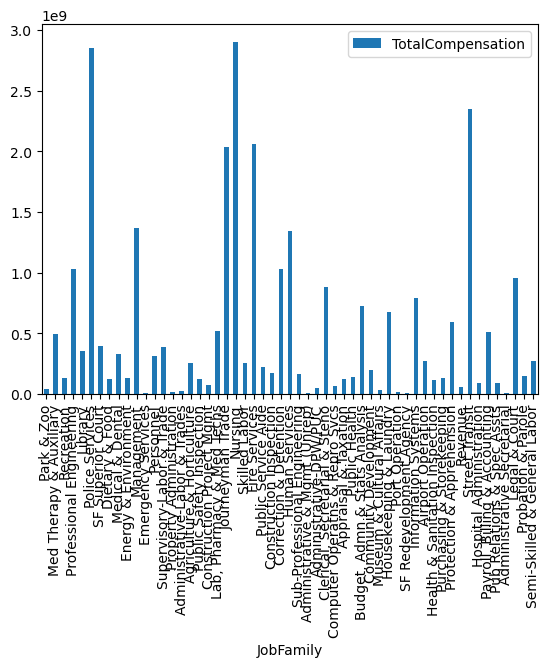

In [14]:
from pyspark.sql.functions import sum
from matplotlib.pyplot import plot
import pandas as pd
df5=df2.orderBy("TotalCompensation").groupBy("JobFamily").agg(sum("TotalCompensation").alias("TotalCompensation"))
df6=df5.toPandas()
df6.plot.bar(x='JobFamily', y='TotalCompensation')

#### 5.3. Check Correlation of Target Variable with Other Independent Variables. Plot Heatmap

/tmp/ipykernel_7205/1554319625.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df7.corr(), annot=True, fmt='.2g', cmap='coolwarm')


<AxesSubplot:>

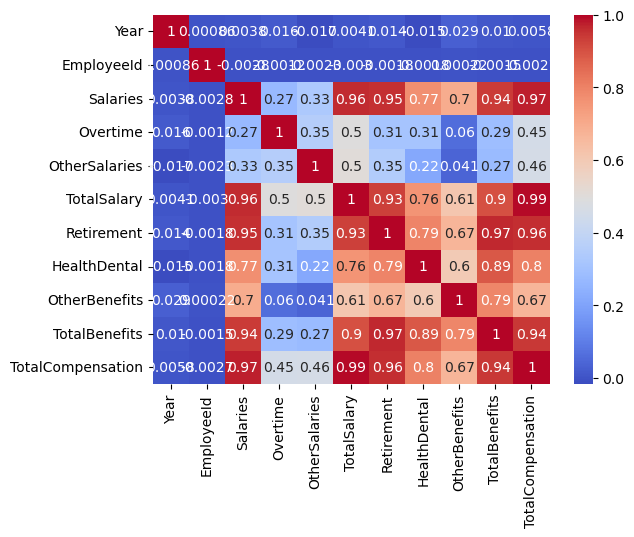

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df7=df2.toPandas()
#corr=df2.corr('TotalCompensation', 'Year')
sns.heatmap(df7.corr(), annot=True, fmt='.2g', cmap='coolwarm')

### 6. Perform necessary data pre-processing and divide the data into train and test set

### 6.1 Categorise the attributes into its type (Use one hot encoding wherever required)

In [ ]:
from pyspark.ml.feature import StringIndexer
indexers = StringIndexer(inputCols= ['OrganizationGroup','Department','Union','JobFamily','Job'], 
                         outputCols=['OrgGrpIndexed', 'Department_indexed', 'Union_indexed', 'JobFamily_indexed', 'Job_indexed])


In [ ]:
from pyspark.ml.feature import OneHotEncoder
encoder=OneHotEncoder(input_cols=['OrganizationGroup','Department','Union','JobFamily','Job'],
                     outputcols=['OrgGrpVec','DeptVec','UnionVec','JobFamilyVec','JobVec'])
encodedDF=encoder.fit(strindexedDF).transform(strindexedDF)

### 6.2 Split the data into train and test set

In [18]:
import pandas as pd
trainDF, testDF =  df2.randomSplit([0.7,0.3], seed = 2020)
print("Observations in training set = ", trainDF.count())
print("Observations in testing set = ", testDF.count())

Observations in training set =  203282


Observations in testing set =  87064


### 7. Fit Linear Regression model on the data and check its performance

In [19]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol="features", labelCol="label",maxIter= 10,regParam=0.3, elasticNetParam=0.8)
lrmodel = lr.fit(trainDF)
predictonDF = lrmodel.transform(testDF)
predictonDF.select("label","rawPrediction", "probability", "prediction").show(10,False)

IllegalArgumentException: features does not exist. Available: Year Type, Year, OrganizationGroup, Department, Union, JobFamily, Job, EmployeeId, Salaries, Overtime, OtherSalaries, TotalSalary, Retirement, HealthDental, OtherBenefits, TotalBenefits, TotalCompensation

### 8. Fit Decision Tree Regression model on the data and check its performance (Optional)

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='scaled_features', labelCol = 'Total Compensation')
dt_model = dt.fit(trainDF)

### Model Persistence (Optional)
Model persistence means saving your model to a disk. After you finalize your model for prediction depending upon the performance, you need to save the model to the disk. Let's say, you finalize 'lrmodel' to be used for in production environment i.e. in your application. We use the following code to save it.

##### Saving the model

In [ ]:
# use save() method to save the model
# write().overwrite() is usually used when you want to replace the older model with a new one
# It might happen that you wish to retrain your model and save it at the same the place
lrmodel.write().overwrite().save("/FileStore/models/lrmodel")

##### Loading the model

In [ ]:
# import PipelineModel from pyspark.ml package
from pyspark.ml import PipelineModel

# load the model from the location it is stored
# The loaded model acts as PipelineModel
pipemodel = PipelineModel.load("/FileStore/models/lrmodel")

# use the PipelineModel object to perform prediciton on test data. 
# Use .transform() to perfrom prediction
prediction = pipemodel.transform(testDF)

# print the results
prediction.select('label', 'rawPrediction', 'probability', 'prediction').show(5)